1. Import Required Libraries



In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


2. Load the Dataset

In [3]:
# Load the dataset
df = pd.read_csv("crop_recommendation.csv")

# Display the first few rows of the dataset
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


3. Perform EDA (Exploratory Data Analysis)

3.1. Basic Data Insights

In [4]:
# Dataset structure
print("Shape of Dataset:", df.shape)
print("\nColumns in Dataset:", df.columns)
print("\nMissing Values:", df.isnull().sum())

# Summary statistics
df.describe()


Shape of Dataset: (2200, 8)

Columns in Dataset: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Missing Values: N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


3.2. Visualizations

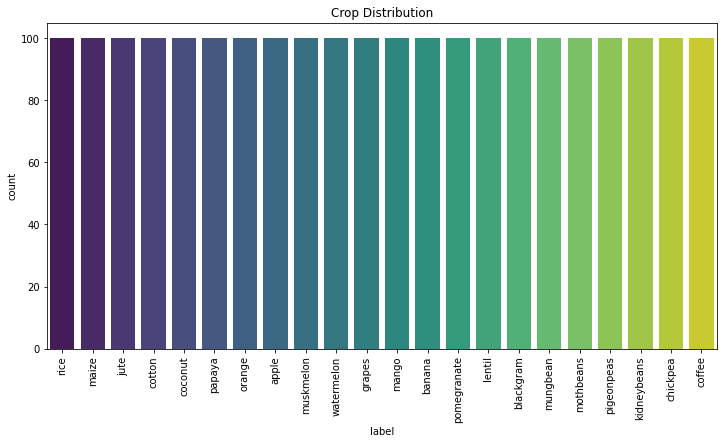

In [5]:
# Distribution of crops
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()

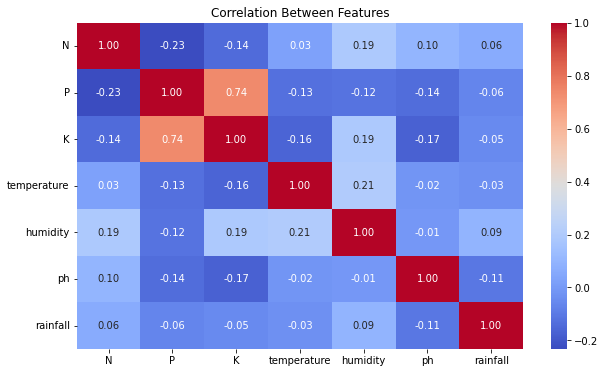

In [8]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Between Features")
plt.show()


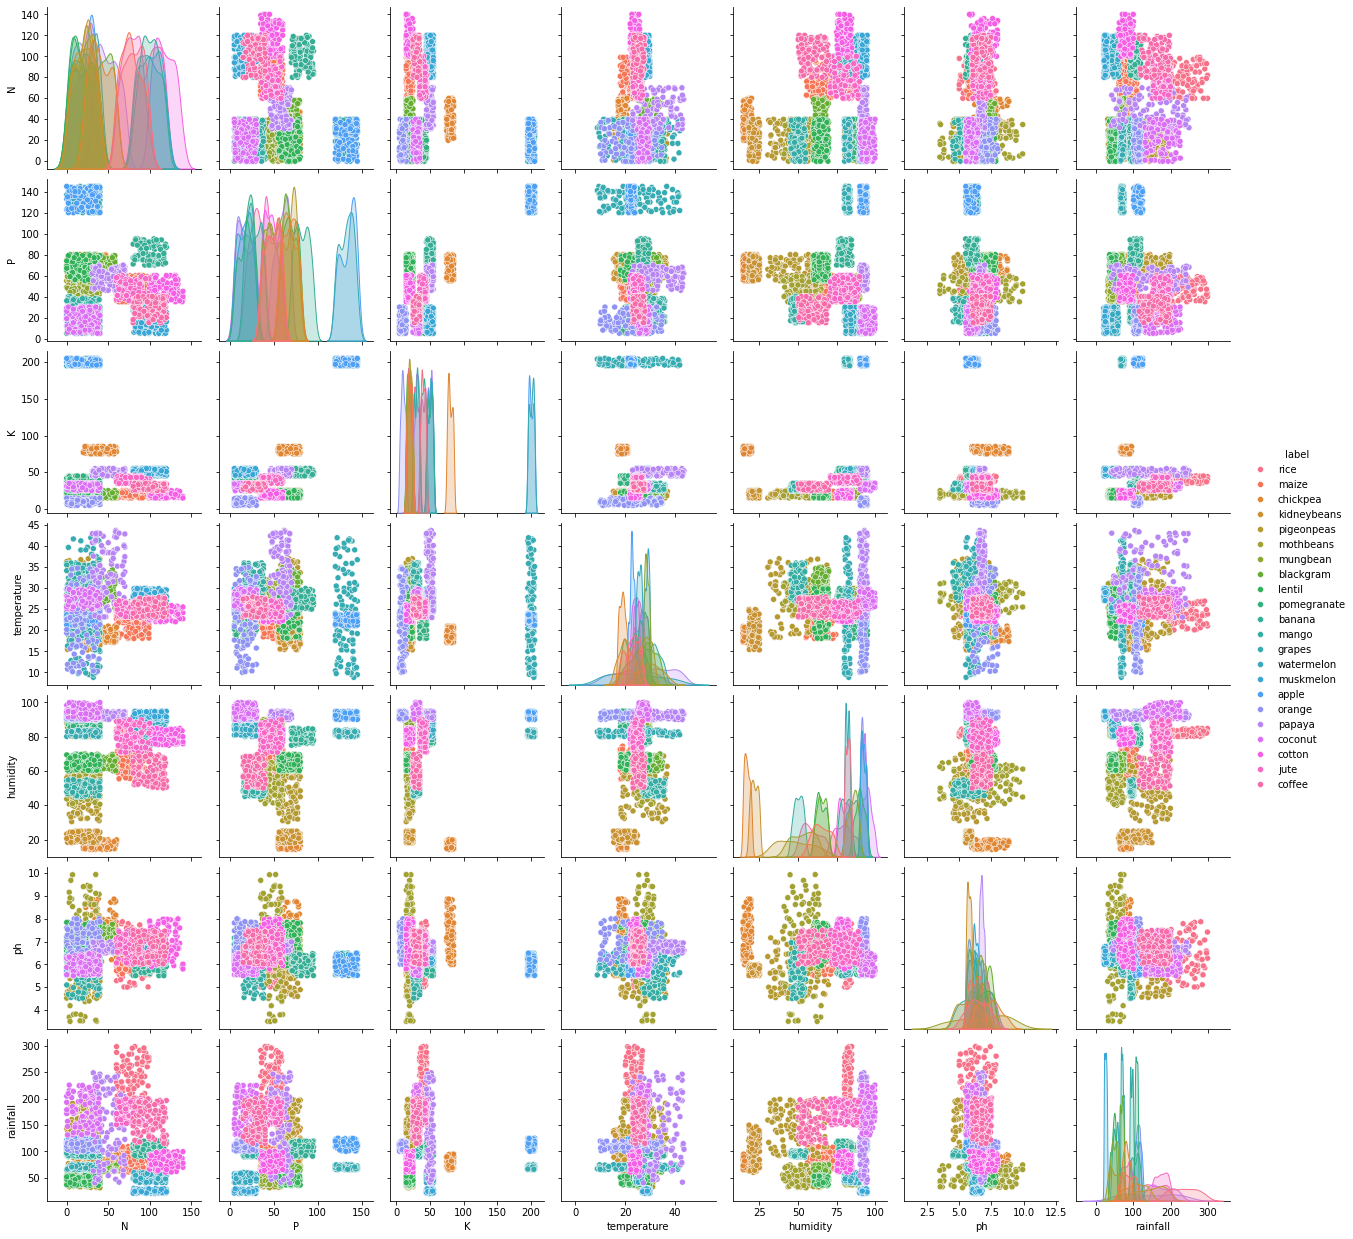

In [9]:
# Pairplot for feature relationships
sns.pairplot(df, hue="label", diag_kind="kde", palette="husl")
plt.show()

4. Feature Engineering

In [10]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


5. Train ML Models

5.1. Split Data

In [11]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


5.2. Random Forest Classifier

Random Forest Classifier Results:
Accuracy: 0.990909090909091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.85      1.00      0.92        34
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00     

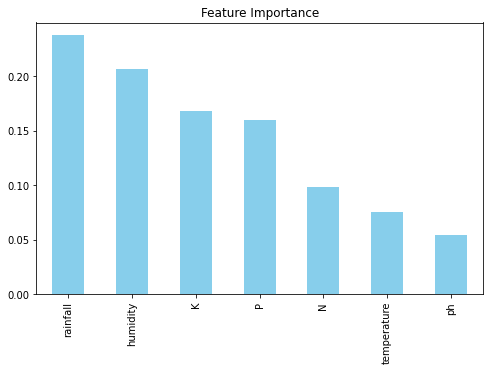

In [12]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Feature Importance")
plt.show()


6. Multicropping Analysis

In [16]:
#Define Input Data with Correct Features

# Example input (ensure it matches the training data structure)
input_data = [60, 40, 50, 25, 80, 6.5, 120]  # Adjust the values to include all required features


In [17]:
#Check Feature Order

# Ensure input_data matches the column order of X
print(f"Training features: {list(X.columns)}")


Training features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [37]:
# Compatibility dictionary (expanded)
compatible_crops = {
    "Rice": ["Chickpea", "Mustard"],
    "Wheat": ["Peas", "Lentil"],
    "Maize": ["Soybean", "Cowpea"],
    "Sugarcane": ["Turmeric", "Ginger"],
    "Banana": ["Pineapple", "Coconut"],
    "Coffee": ["Pepper", "Cardamom"],
    "Mango": ["Papaya", "Guava"],
    # Add additional mappings as needed
}

# Function to predict primary and compatible crops
def recommend_crop(data):
    # Predict the primary crop
    predicted_label = rf_model.predict([data])
    crop = encoder.inverse_transform(predicted_label)[0]
    
    # Fetch compatible crops
    compatible = compatible_crops.get(crop, ["No compatible crops available for this crop."])
    
    return crop, compatible

# Example input with 7 parameters
input_data = [60, 40, 50, 25, 80, 6.5, 200]  # Example values for N, P, K, temperature, humidity, pH, rainfall

# Get recommendations
predicted_crop, compatible_crops = recommend_crop(input_data)

# Print output
print(f"Recommended Primary Crop: {predicted_crop}")
print(f"Compatible Crops for Multicropping: {compatible_crops}")

Recommended Primary Crop: jute
Compatible Crops for Multicropping: ['No compatible crops available for this crop.']


In [41]:
input_data = [60,40,50,25, 80,  6.5, 200 ]
# Get recommendations
predicted_crop, compatible_crops = recommend_crop(input_data)

# Print output
print(f"Recommended Primary Crop: {predicted_crop}")
print(f"Compatible Crops for Multicropping: {compatible_crops}")


Recommended Primary Crop: jute
Compatible Crops for Multicropping: ['No compatible crops available for this crop.']


In [22]:
#Add Compatibility for "Jute":

compatible_crops = {
    "Rice": ["Chickpea", "Mustard"],
    "Wheat": ["Peas", "Lentil"],
    "Maize": ["Soybean", "Cowpea"],
    "Jute": ["Rice", "Chickpea"],  # Add compatible crops for "Jute"
}


In [23]:
#Handle Missing Compatibility Gracefully:

def recommend_crop(data):
    predicted_label = rf_model.predict([data])  # Ensure input matches training features
    crop = encoder.inverse_transform(predicted_label)[0]  # Decode label to crop name
    compatible_list = compatible_crops.get(crop, "No compatible crops defined")  # Handle missing entries
    return crop, compatible_list


In [24]:

# Example input
input_data = [60, 40, 50, 25, 80, 6.5, 120]  # Ensure this matches the training features

# Make prediction
predicted_crop, compatible_list = recommend_crop(input_data)

# Output
print(f"Recommended Primary Crop: {predicted_crop}")
print(f"Compatible Crops for Multicropping: {compatible_list}")


Recommended Primary Crop: jute
Compatible Crops for Multicropping: No compatible crops defined


In [26]:
# Define inter-crop compatibility rules
compatible_crops = {
    "Rice": ["Chickpea", "Mustard"],
    "Wheat": ["Peas", "Lentil"],
    "Maize": ["Soybean", "Cowpea"],  # Adding compatible crops for maize
    # Add more crop pairings based on agronomic knowledge
}

# Predict crop for given conditions
def recommend_crop(data):
    predicted_label = rf_model.predict([data])  # Ensure input matches training features
    crop = encoder.inverse_transform(predicted_label)[0]  # Decode label to crop name
    compatible_list = compatible_crops.get(crop, ["No compatible crops defined"])  # Default message if no compatible crops found
    return crop, compatible_list

# New example input for recommendation
input_data = [80, 50, 60, 30, 70, 7.0, 100]  # N, P, K, Temperature, Humidity, pH, Rainfall

# Make prediction
predicted_crop, compatible_list = recommend_crop(input_data)

# Output
print(f"Recommended Primary Crop: {predicted_crop}")
print(f"Compatible Crops for Multicropping: {compatible_list}")


Recommended Primary Crop: maize
Compatible Crops for Multicropping: ['No compatible crops defined']


In [31]:
# Define inter-crop compatibility rules
compatible_crops = {
    "Rice": ["Chickpea", "Mustard"],
    "Wheat": ["Peas", "Lentil"],
    "Maize": ["Soybean", "Cowpea"],  # Adding compatible crops for maize
    # Add more crop pairings based on agronomic knowledge
}

# Predict crop for given conditions
def recommend_crop(data):
    predicted_label = rf_model.predict([data])  # Ensure input matches training features
    crop = encoder.inverse_transform(predicted_label)[0]  # Decode label to crop name
    compatible_list = compatible_crops.get(crop, None)  # None if no compatible crops are found
    
    # Handle case where no compatible crops are found
    if not compatible_list:
        compatible_list = ["No compatible crops defined"]
        
    return crop, compatible_list

# New example input for recommendation
input_data = [60, 40, 50, 25, 80, 6.5, 100]  # N, P, K, Temperature, Humidity, pH, Rainfall

# Make prediction
predicted_crop, compatible_list = recommend_crop(input_data)

# Output
print(f"Recommended Primary Crop: {predicted_crop}")
print(f"Compatible Crops for Multicropping: {compatible_list}")


Recommended Primary Crop: jute
Compatible Crops for Multicropping: ['No compatible crops defined']


7. Visualizing Multicropping Strategies


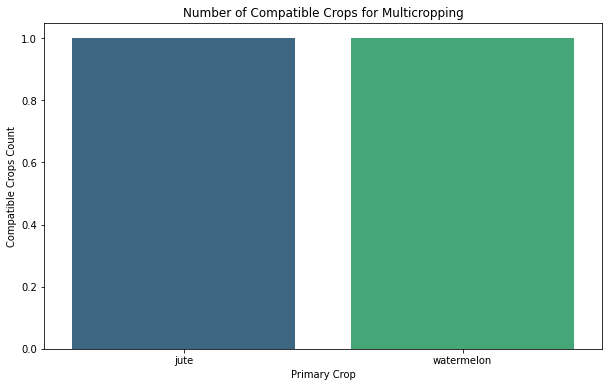

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate a multicropping recommendation dataset
recommendation_results = []
for i in range(5):
    # Example: Adjust conditions slightly for variations
    conditions = [60 + i * 5, 40 - i * 3, 50 + i * 2, 25, 80, 6.5 + i * 0.1, 100]  # Added Rainfall as 7th feature
    crop, compatible = recommend_crop(conditions)
    recommendation_results.append({"Primary Crop": crop, "Compatible Crops": compatible})

# Display results as a DataFrame
recommendation_df = pd.DataFrame(recommendation_results)

# Calculate number of compatible crops (length of the list in 'Compatible Crops')
recommendation_df['Compatible Crops Count'] = recommendation_df['Compatible Crops'].apply(lambda x: len(x))

# Visualizing recommendations
plt.figure(figsize=(10, 6))
sns.barplot(x="Primary Crop", y="Compatible Crops Count", data=recommendation_df, palette="viridis")
plt.title("Number of Compatible Crops for Multicropping")
plt.show()


In [42]:
# Evaluate model performance
y_pred = rf_model.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.09%
